# PIMA Diabetes Dataset

In this notebook, I have made an attempt  to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

Here, I have implemented various Classification techniques and since the dataset is fairly balanced in terms of 0 and 1 outcomes, the best accuracy which I could come up with was 77.604% using ensemble RANDOM FOREST classifier.

**Note: In the dataset some independent variables have '0' values like Insulin, Blood Pressure(which realistically can't be zero). So, I have tried to replace those '0' values by using imputer technique.**

# Importing the Libraries and reading the csv data file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()
#to check for missing values in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

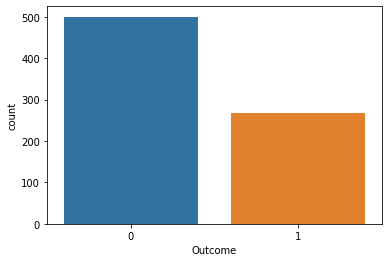

In [5]:
import seaborn as sns
sns.countplot(x='Outcome', data=df)
plt.show()

In [6]:
diabetes_count = len(df.loc[df['Outcome'] == 1])
no_diabetes_count=len(df.loc[df['Outcome']==0])
(diabetes_count, no_diabetes_count)

(268, 500)

The dataset is fairly balanced in terms of 0 and 1 outcomes.

# EDA, Data Visualization & Data Cleaning

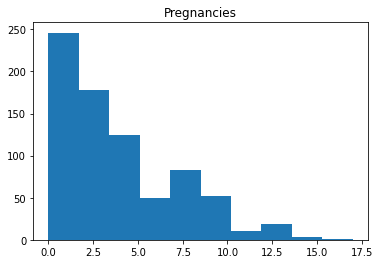

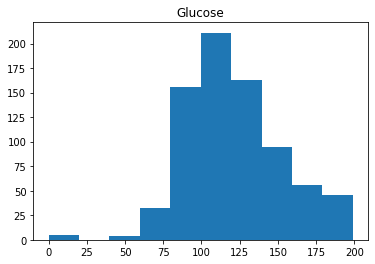

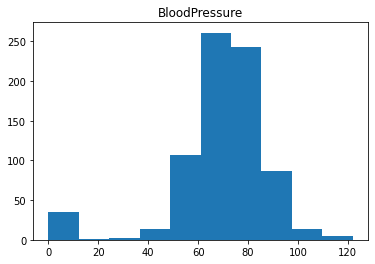

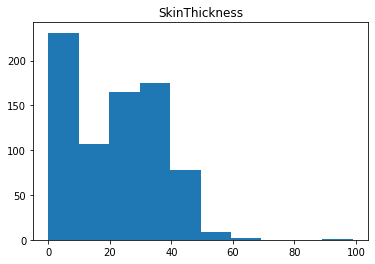

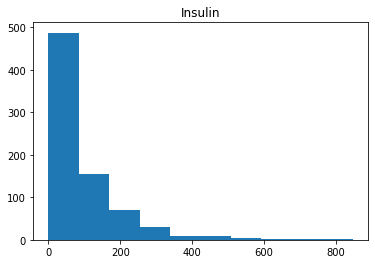

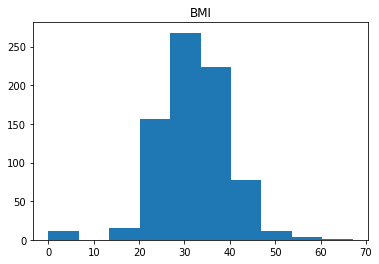

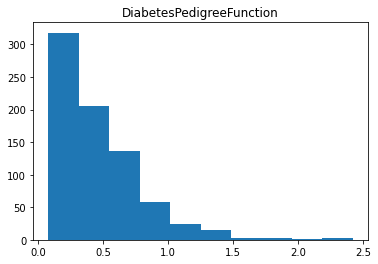

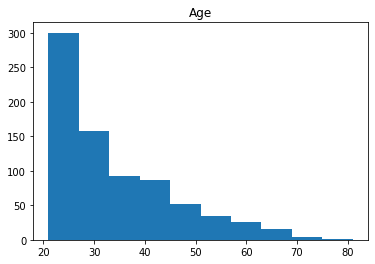

In [7]:
#distribution of various parameters in the dataset except the target variable
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness',
      'Insulin','BMI','DiabetesPedigreeFunction','Age']
num=df[cols]
for i in num.columns:
    plt.hist(num[i])
    plt.title(i)
    plt.show()

Some variables have '0' values. However, we need to replace those '0' values by using imputer technique.

# Note: In the dataset some independent variables have '0' values like Insulin, Blood Pressure(which realistically can't be zero). So, I have tried to replace those '0' values by using imputer technique.

In [8]:
print("total number of rows : {0}".format(len(df)))
print("number of rows with 0 Pregnancies: {0}".format(len(df.loc[df['Pregnancies'] == 0])))
print("number of rows with 0 Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows with 0 BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows with 0 SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("number of rows with 0 Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows with 0 BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows with 0 DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("number of rows with 0 Ages: {0}".format(len(df.loc[df['Age'] == 0])))

total number of rows : 768
number of rows with 0 Pregnancies: 111
number of rows with 0 Glucose: 5
number of rows with 0 BloodPressure: 35
number of rows with 0 SkinThickness: 227
number of rows with 0 Insulin: 374
number of rows with 0 BMI: 11
number of rows with 0 DiabetesPedigreeFunction: 0
number of rows with 0 Ages: 0


In [9]:
from sklearn.impute import SimpleImputer
zcol=['Glucose','BloodPressure','SkinThickness',
      'Insulin','BMI']
zcols=df[zcol]
imputer = SimpleImputer(missing_values=0, strategy="mean", verbose=0)
imputed_df = pd.DataFrame(imputer.fit_transform(zcols))
imputed_df.columns = zcols.columns
temp=imputed_df.copy()
zcols=temp.copy()

In [10]:
zcols.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.00000,155.548223,33.6
1,85.0,66.0,29.00000,155.548223,26.6
2,183.0,64.0,29.15342,155.548223,23.3
3,89.0,66.0,23.00000,94.000000,28.1
4,137.0,40.0,35.00000,168.000000,43.1


In [11]:
df.drop(['Glucose','BloodPressure','SkinThickness',
      'Insulin','BMI'], axis=1, inplace=True)

In [12]:
df=df.join(zcols)
df.head()

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,6,0.627,50,1,148.0,72.0,35.00000,155.548223,33.6
1,1,0.351,31,0,85.0,66.0,29.00000,155.548223,26.6
2,8,0.672,32,1,183.0,64.0,29.15342,155.548223,23.3
3,1,0.167,21,0,89.0,66.0,23.00000,94.000000,28.1
4,0,2.288,33,1,137.0,40.0,35.00000,168.000000,43.1


In [13]:
df.dtypes

Pregnancies                   int64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
dtype: object

All the O values have now been filled with median values

In [14]:
outcome=df['Outcome']
df.drop(['Outcome'], axis=1, inplace=True)
df=df.join(outcome)
df.head()

,Pregnancies,DiabetesPedigreeFunction,Age,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
0,6,0.627,50,148.0,72.0,35.00000,155.548223,33.6,1
1,1,0.351,31,85.0,66.0,29.00000,155.548223,26.6,0
2,8,0.672,32,183.0,64.0,29.15342,155.548223,23.3,1
3,1,0.167,21,89.0,66.0,23.00000,94.000000,28.1,0
4,0,2.288,33,137.0,40.0,35.00000,168.000000,43.1,1


In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
X.head()

,Pregnancies,DiabetesPedigreeFunction,Age,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,6,0.627,50,148.0,72.0,35.00000,155.548223,33.6
1,1,0.351,31,85.0,66.0,29.00000,155.548223,26.6
2,8,0.672,32,183.0,64.0,29.15342,155.548223,23.3
3,1,0.167,21,89.0,66.0,23.00000,94.000000,28.1
4,0,2.288,33,137.0,40.0,35.00000,168.000000,43.1


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Train, Test Split

Split the dataset into train and test sets in a way that preserves the same proportions of observations in each class as observed dataset

In [18]:
# stratify the outcome
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)
#stratify=y

In [19]:
X_train.head()

,Pregnancies,DiabetesPedigreeFunction,Age,Glucose,BloodPressure,SkinThickness,Insulin,BMI
432,1,0.527,22,80.0,74.000000,11.00000,60.000000,30.000000
453,2,0.832,72,119.0,72.405184,29.15342,155.548223,19.600000
706,10,0.261,30,115.0,72.405184,29.15342,155.548223,32.457464
606,1,1.258,22,181.0,78.000000,42.00000,293.000000,40.000000
118,4,0.443,22,97.0,60.000000,23.00000,155.548223,28.200000


In [20]:
X_test.head()

,Pregnancies,DiabetesPedigreeFunction,Age,Glucose,BloodPressure,SkinThickness,Insulin,BMI
147,2,1.400,34,106.0,64.0,35.00000,119.000000,30.5
565,2,0.748,22,95.0,54.0,14.00000,88.000000,26.1
390,1,0.444,42,100.0,66.0,29.00000,196.000000,32.0
736,0,0.515,21,126.0,86.0,27.00000,120.000000,27.4
587,6,0.249,29,103.0,66.0,29.15342,155.548223,24.3


# Apply ML Algorithms

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=8)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

Logistic Regression

In [22]:
#Logistic Regression
lr = LogisticRegression(random_state=0)
cv = cross_val_score(lr,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred_lr,y_test)*100)
cm=confusion_matrix(y_test, y_pred_lr)
print(cm)
print(classification_report(y_test, y_pred_lr))

/home/allyson/anaconda3/envs/diabetes/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/allyson/anaconda3/envs/diabetes/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

[0.73611111 0.75       0.69444444 0.77777778 0.81944444 0.69444444
 0.79166667 0.72222222]
74.82638888888889
The accuracy of the Logistic Regression is 76.5625
[[109  16]
 [ 29  38]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       125
           1       0.70      0.57      0.63        67

    accuracy                           0.77       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192



/home/allyson/anaconda3/envs/diabetes/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KNN

In [23]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2, 
                           leaf_size = 5,weights='distance')
knn.fit(X_train, y_train)
cv = cross_val_score(knn,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_knn = knn.predict(X_test)
print('The accuracy of the K-Neighbors Classifier is',metrics.accuracy_score(y_pred_knn,y_test)*100)
cm=confusion_matrix(y_test, y_pred_knn)
print(cm)
print(classification_report(y_test, y_pred_knn))

[0.69444444 0.73611111 0.76388889 0.73611111 0.76388889 0.76388889
 0.72222222 0.72222222]
73.78472222222221
The accuracy of the K-Neighbors Classifier is 75.52083333333334
[[107  18]
 [ 29  38]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       125
           1       0.68      0.57      0.62        67

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



Random Forest Classifier

In [24]:
#Random Forest Classifier
rf = RandomForestClassifier(criterion='entropy', max_depth=40, max_features='log2',
                       min_samples_leaf=4, min_samples_split=8,
                       n_estimators=500, random_state=0)
rf.fit(X_train, y_train)
cv = cross_val_score(rf,X_train,y_train,cv=kfold)
print(cv)
print(cv.mean()*100)
y_pred_rf = rf.predict(X_test)
print('The accuracy of the RandomForestClassifier is',metrics.accuracy_score(y_pred_rf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_rf)
print(cm)
print(classification_report(y_test, y_pred_rf))

[0.72222222 0.80555556 0.76388889 0.80555556 0.79166667 0.72222222
 0.76388889 0.73611111]
76.38888888888889
The accuracy of the RandomForestClassifier is 77.60416666666666
[[109  16]
 [ 27  40]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       125
           1       0.71      0.60      0.65        67

    accuracy                           0.78       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



# Save the model as a Pickle

In [25]:
import pickle
pickle.dump(rf, open("rf.pkl", "wb"))